In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd

## Lecture 17

### Learning objectives

- Making maps using the Python package **Cartopy**.
- Types of map projections.
- Distribution of earthquakes.

### 17.1 Introduction to maps

There are many different ways to create maps in Python.
Here we will introduce you to using the package **cartopy**. 
Note: If you are not using MyBinder, this lecture requires cartopy version 0.18.0.

Below are the packages need to make maps with **cartopy**: 

In [2]:
import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

There are many different types of maps used in the Earth Sciences.  A map tries to represent something that is essentially 3-D (a globe) onto a 2-D medium (paper or a computer screen). So all maps, except those at the smallest scale, will increasingly distort the area as the scale increases because the Earth is not two-dimensional. [No the Earth is not flat! https://en.wikipedia.org/wiki/Modern_flat_Earth_societies]

When we choose a map projection, we seek the one that distorts the least for our purpose.  

Here we will use a few popular projections to make maps on both the global and local scale.  Let's start with the global projections.  

### 17.2 Mercator projection
The one probably everyone is familiar with is the  standard Mercator Projection:

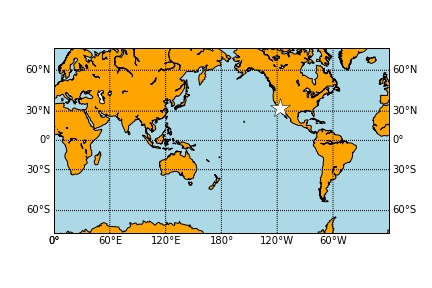

In [3]:
Image(filename='Figures/mercator.jpg', width=500)

In **cartopy** maps are instances of the `Axes` figure class. They have many methods, for example outlining continents, national boundaries, and state boundaries and plotting geospatial data, such as sampling locations, earthquakes, and much else.

Before we plot can plot a set of coordinates, they must be transformed from latitudes and longitudes to map coordinates and  then plotted like anything else in **matplotlib**.  

To make a map instance, we use the `projection` keyword in the `plt.axes()` object (normally assigned a variable named `ax`). 

To set up the map, you need to know what type of projection you want (there are a growing number to choose from) and depending on the projection type, you need to know the map boundaries and other particulars.  

We are starting  with the Mercator projection. To do this, we set the  projection keyword to `ccrs.Mercator`.  

In [4]:
help(ccrs.Mercator)

Help on class Mercator in module cartopy.crs:

class Mercator(Projection)
 |  Mercator(central_longitude=0.0, min_latitude=-80.0, max_latitude=84.0, globe=None, latitude_true_scale=None, false_easting=0.0, false_northing=0.0, scale_factor=None)
 |  
 |  A Mercator projection.
 |  
 |  Method resolution order:
 |      Mercator
 |      Projection
 |      cartopy._crs.CRS
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __hash__(self)
 |      Hash the CRS based on its proj4_init string.
 |  
 |  __init__(self, central_longitude=0.0, min_latitude=-80.0, max_latitude=84.0, globe=None, latitude_true_scale=None, false_easting=0.0, false_northing=0.0, scale_factor=None)
 |      Parameters
 |      ----------
 |      central_longitude: optional
 |          The central longitude. Defaults to 0.
 |      min_latitude: optional
 |          The maximum southerly extent of the projection. Defaults
 |          to -80 degrees.
 |   

So we need: `central_longitude`, `min_latitude`, and `max_latitude`.


We make the map instance with a call like:  
```python
ax = plt.axes(projection=ccrs.Mercator(central_longitude=180.0, min_latitude=-70.0, max_latitude=70.0, globe=None))
```

We also have to put something on the map, so let's draw the coastlines by using the `coastlines()` method of the `ax` object: 
```python
ax.coastlines()
```

Here's our  basic Mercator map of the whole world: 

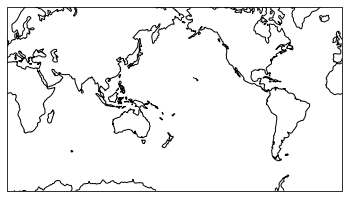

In [5]:
ax = plt.axes(projection=ccrs.Mercator(
    central_longitude=180.0, min_latitude=-70.0, max_latitude=70.0, globe=None))
ax.coastlines();

We usually want lines of latitude (parallels) and longitude (meridians) on there as well, so we use the `ax.gridlines()` method with the keyword `crs = ccrs.PlateCarree()` to   make a globe object (usually given the variable name `g` or `g1`).   

In [6]:
help(ax.gridlines)

Help on method gridlines in module cartopy.mpl.geoaxes:

gridlines(crs=None, draw_labels=False, xlocs=None, ylocs=None, dms=False, x_inline=None, y_inline=None, auto_inline=True, xformatter=None, yformatter=None, **kwargs) method of cartopy.mpl.geoaxes.GeoAxesSubplot instance
    Automatically add gridlines to the axes, in the given coordinate
    system, at draw time.
    
    Parameters
    ----------
    crs: optional
        The :class:`cartopy._crs.CRS` defining the coordinate system in
        which gridlines are drawn.
        Defaults to :class:`cartopy.crs.PlateCarree`.
    draw_labels: optional
        Label gridlines like axis ticks, around the edge.
    xlocs: optional
        An iterable of gridline locations or a
        :class:`matplotlib.ticker.Locator` instance which will be
        used to determine the locations of the gridlines in the
        x-coordinate of the given CRS. Defaults to None, which
        implies automatic locating of the gridlines.
    ylocs: option

Now we stick the latitudes and longitudes onto our globe object (`g1` in the following example). We will need the `matplotlib.ticker` module (already imported as `mticker`) which has the useful attributes  `mticker.FixedLocator()` method which allows us to make an create a special object of latitudes or longitudes with the desired spacing (using our old friend `np.arange()`). These can be attached to the figure object using figure attributes `g1.ylocator` and `g1.xlocator` for latitudes and longitudes respectively.  (You'll see how this works soon, so be a little patient!).  

The steps are: 

1) Make the figure object (`ax`) with the desired projection using `plt.axes()`.

2) Put on the coastlines.

3) Make the globe object (`g1`) using `ax.gridlines()`.

4) Put on the latitude and longitudes by setting the `g1.ylocator` and `g1.xlocator` attributes to the desired `mticker.FixedLocator(ARRAY)` object.  

Here we go: 

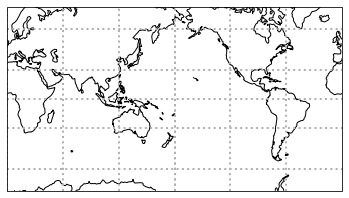

In [7]:
# make the figure object
ax = plt.axes(projection=ccrs.Mercator(
    central_longitude=180.0, min_latitude=-70.0, max_latitude=70.0, globe=None))
# put on the coastlines
ax.coastlines()
# make the globe object
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, linestyle='dotted')
# put on the latitudes
gl.ylocator = mticker.FixedLocator(np.arange(-90.0, 91.0, 30.0))
# put on the longitudes
gl.xlocator = mticker.FixedLocator(np.arange(-180.0, 181.0, 60.0));


And surely you want the lat/long labels to show, so you can modify your commands like this:

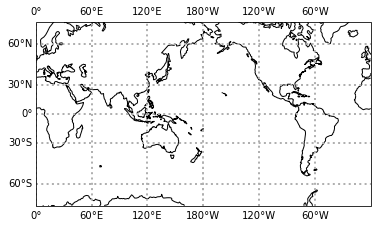

In [8]:
ax = plt.axes(projection=ccrs.Mercator(
    central_longitude=180.0, min_latitude=-70.0, max_latitude=70.0, globe=None))
ax.coastlines()
g1 = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, linestyle='dotted', draw_labels=True)
g1.ylocator = mticker.FixedLocator(np.arange(-90.0, 91.0, 30.0))
g1.xlocator = mticker.FixedLocator(np.arange(-180.0, 181.0, 60.0))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER

To turn labels off for the top, bottom or left or sides, we can use attributes of the globe object like this: 

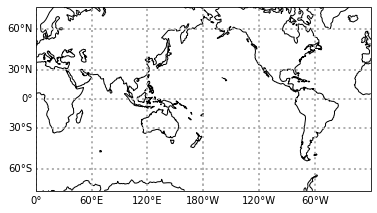

In [9]:
ax = plt.axes(projection=ccrs.Mercator(
    central_longitude=180.0, min_latitude=-70.0, max_latitude=70.0, globe=None))
ax.coastlines()

g1 = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, linestyle='dotted', draw_labels=True)
g1.ylocator = mticker.FixedLocator(np.arange(-90.0, 91.0, 30.0))
g1.xlocator = mticker.FixedLocator(np.arange(-180.0, 181.0, 60.0))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER

g1.top_labels = False # Turn off top labels



Now maybe you want some color?  You can set the color of the continents with:
```python
ax.add_feature(LAND, color='orange')
```
and color in the oceans with: 
```python
ax.add_feature(OCEAN, color='lightblue')
```

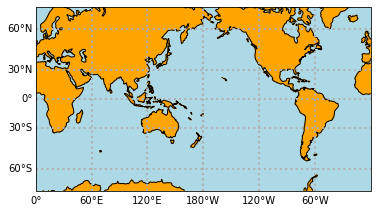

In [10]:
ax = plt.axes(projection=ccrs.Mercator(
    central_longitude=180.0, min_latitude=-70.0, max_latitude=70.0, globe=None))

g1 = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, linestyle='dotted', draw_labels=True)
g1.ylocator = mticker.FixedLocator(np.arange(-90.0, 91.0, 30.0))
g1.xlocator = mticker.FixedLocator(np.arange(-180.0, 181.0, 60.0))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER

g1.top_labels = False # Turn off top labels

# Add ocean and land
ax.add_feature(OCEAN, color='lightblue')
ax.add_feature(LAND, color='orange')
ax.coastlines(); # This has to come last, or it is buried by the ocean, land colors

The lakes are missing! You can change lake colors using the `LAKES` attribute if you so desire. You can set the facecolor and edgecolor separately.  

You also want to plot something on the map? No problem. Just take your latitude and longitude (or arrays of them) and convert them to map coordinates using the `transform = ccrs.Geodetic()` keyword in the `plt.plot()` command.  These you plot just like any ordinary matplotlib plot, except you need a `ax.set_global()` command after the plot, or you get a map near San Diego (for some reason...).  

Let's plot the position of San Diego as a big white star using the arguments: `marker="\*"`, `markersize=20`, and `color='white'`.

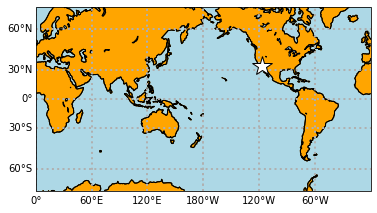

In [11]:
ax = plt.axes(projection=ccrs.Mercator(
    central_longitude=180.0, min_latitude=-70.0, max_latitude=70.0, globe=None))

g1 = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, linestyle='dotted', draw_labels=True)
g1.ylocator = mticker.FixedLocator(np.arange(-90.0, 91.0, 30.0))
g1.xlocator = mticker.FixedLocator(np.arange(-180.0, 181.0, 60.0))
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER

g1.top_labels = False # Turn off top labels

# Add ocean and land and lakes
ax.add_feature(OCEAN, color='lightblue')
ax.add_feature(LAND, color='orange')
ax.add_feature(LAKES, facecolor='lightblue', edgecolor='black')
ax.coastlines()

# Add symbol corresponding to the location of San Deigo 
San_lat = 33.0
San_lon = -117%360  # Takes the west longitude and converts to 0=>360

ax.plot([San_lon], [San_lat], marker='*', color='white',\
        markersize=20, transform=ccrs.Geodetic(), markeredgecolor='black')
ax.set_global() # We need this or weird things happen
ax.coastlines();

### 17.3 Orthographic projection

The Mercator is a nice classical map, but it sure does distort the map at high latitudes. Think back to the lecture on the hypsometric curves...  

Another type of map projection is the orthographic projection which is much less distorted. The downside to this projection is that you cannot see the whole globe at once.   To create an orthographic map, you initialize a map instance with the projection set to `ccrs.Orthographic()` and a tuple of the central longitude and latitude. 

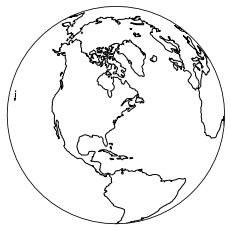

In [12]:
ax = plt.axes(projection=ccrs.Orthographic(-75.0, 42.0))
ax.coastlines();

And finish the map as before.  

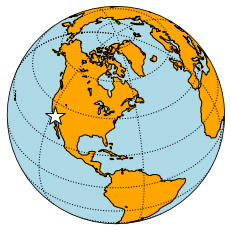

In [13]:
ax = plt.axes(projection=ccrs.Orthographic(-75.0, 42.0))
San_lat = 33.0
San_lon = -117%360  # Takes the west longitude and converts to 0=>360 using modular syntax
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='black', linewidth=1, linestyle='dotted')
gl.ylocator = mticker.FixedLocator(np.arange(-80.0, 81.0, 20.0))
gl.xlocator = mticker.FixedLocator(np.arange(-180.0, 181.0, 60.0));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.add_feature(OCEAN, color='lightblue')
ax.add_feature(LAND, color='orange')
ax.add_feature(LAKES, facecolor='lightblue', edgecolor='black')
ax.plot([San_lon], [San_lat], marker='*', color='white',\
        markersize=20, transform=ccrs.Geodetic(), markeredgecolor='black')
ax.set_global()
ax.coastlines();

### 17.4 Mollweide projection

One more global scale example of a map projection is the Hammer projection (one of my favorites). Unfortunately, **cartopy** does not have a Hammer projection (yet), so we will learn about a Mollweide projection instead. And really it is pretty similar, so no worries.  The Mollweide projection is always a global map centered on the equator, so all you need to specify is the central longitude (with the `central_longitude` keyword). Note that any central_longitude but 180 is super slow for some reason...  

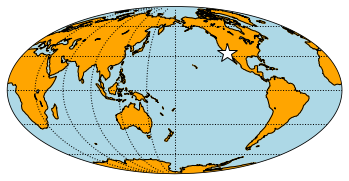

In [14]:
# No Hammer projection in cartopy, but it supports Mollweide
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=180.0))
San_lat = 33.0
San_lon = -117%360  # Takes the west longitude and converts to 0=>360
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='black', linewidth=1, linestyle='dotted')
gl.top_labels = False
gl.ylocator = mticker.FixedLocator(np.arange(-90.0, 91.0, 30.0))
gl.xlocator = mticker.FixedLocator(np.arange(0.0, 400.0, 30.0));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.add_feature(OCEAN, color='lightblue')
ax.add_feature(LAND, color='orange')
ax.add_feature(LAKES, facecolor='lightblue', edgecolor='black')
ax.plot([San_lon], [San_lat], marker='*', color='white',\
        markersize=20, transform=ccrs.Geodetic(), markeredgecolor='black')
ax.set_global()
ax.coastlines();

### 17.5 Lambert conformal 

The maps we've explored so far are well and good for global scale problems, for example plotting the locations of earthquakes around the globe, but not so great for more local problems, like a map of sampling sites.  For this we need a smaller scale map and the Lambert confomal conic projection is a popular choice.  For this we must specify the  central latitude and longitude and the map boundaries (with `ax.set_extent()`).  

Here's what we know so far: 

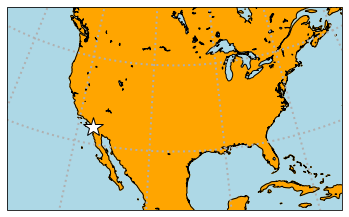

In [15]:
# cartopy does no support labels for this projection yet.
proj = ccrs.LambertConformal(central_longitude=260.0, central_latitude=33.0)
ax = plt.axes(projection=proj)
ax.set_extent([-130.0, -70.0, 20.0, 52.0], crs=ccrs.PlateCarree())
ax.add_feature(OCEAN, color='lightblue')
ax.add_feature(LAND, color='orange')
ax.add_feature(LAKES, facecolor='lightblue', edgecolor='black', linewidth=1)
ax.plot([San_lon], [San_lat], marker='*', color='white',\
        markersize=20, transform=ccrs.Geodetic(), markeredgecolor='black')
gl = ax.gridlines(ylocs=np.arange(0.0, 90.0, 15.0), xlocs=np.arange(-180.0, 180.0, 15.0),\
                linewidth=2, linestyle="dotted")

ax.coastlines();

One problem is that **cartopy** does not support tick labels in the Lambert projection.  I found this work around online (https://gist.github.com/ajdawson/dd536f786741e987ae4e) and let's see if it works.  

In [16]:
import shapely.geometry as sgeom
from copy import copy
def find_side(ls, side):
    """
    Given a shapely LineString which is assumed to be rectangular, return the
    line corresponding to a given side of the rectangle.
    
    """
    minx, miny, maxx, maxy = ls.bounds
    points = {'left': [(minx, miny), (minx, maxy)],
              'right': [(maxx, miny), (maxx, maxy)],
              'bottom': [(minx, miny), (maxx, miny)],
              'top': [(minx, maxy), (maxx, maxy)],}
    return sgeom.LineString(points[side])


def lambert_xticks(ax, ticks):
    """Draw ticks on the bottom x-axis of a Lambert Conformal projection."""
    te = lambda xy: xy[0]
    lc = lambda t, n, b: np.vstack((np.zeros(n) + t, np.linspace(b[2], b[3], n))).T
    xticks, xticklabels = _lambert_ticks(ax, ticks, 'bottom', lc, te)
    ax.xaxis.tick_bottom()
    ax.set_xticks(xticks)
    ax.set_xticklabels([ax.xaxis.get_major_formatter()(xtick) for xtick in xticklabels])
    

def lambert_yticks(ax, ticks):
    """Draw ricks on the left y-axis of a Lamber Conformal projection."""
    te = lambda xy: xy[1]
    lc = lambda t, n, b: np.vstack((np.linspace(b[0], b[1], n), np.zeros(n) + t)).T
    yticks, yticklabels = _lambert_ticks(ax, ticks, 'left', lc, te)
    ax.yaxis.tick_left()
    ax.set_yticks(yticks)
    ax.set_yticklabels([ax.yaxis.get_major_formatter()(ytick) for ytick in yticklabels])

def _lambert_ticks(ax, ticks, tick_location, line_constructor, tick_extractor):
    """Get the tick locations and labels for an axis of a Lambert Conformal projection."""
    outline_patch = sgeom.LineString(ax.spines['geo'].get_path().vertices.tolist())
    axis = find_side(outline_patch, tick_location)
    n_steps = 30
    extent = ax.get_extent(ccrs.PlateCarree())
    _ticks = []
    for t in ticks:
        xy = line_constructor(t, n_steps, extent)
        proj_xyz = ax.projection.transform_points(ccrs.Geodetic(), xy[:, 0], xy[:, 1])
        xyt = proj_xyz[..., :2]
        ls = sgeom.LineString(xyt.tolist())
        locs = axis.intersection(ls)
        if not locs:
            tick = [None]
        else:
            tick = tick_extractor(locs.xy)
        _ticks.append(tick[0])
    # Remove ticks that aren't visible:    
    ticklabels = copy(ticks)
    while True:
        try:
            index = _ticks.index(None)
        except ValueError:
            break
        _ticks.pop(index)
        ticklabels.pop(index)
    return _ticks, ticklabels

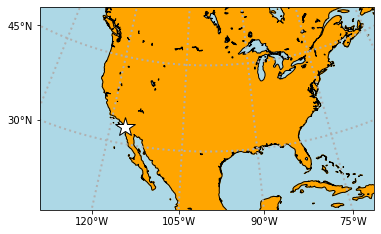

In [17]:
proj = ccrs.LambertConformal(central_longitude=260.0, central_latitude=33.0)
fig = plt.figure(figsize=(6,6), frameon=True) # You need this frameon to be true
ax = plt.axes(projection=proj)
ax.set_extent([-130.0, -70.0, 20.0, 52.0], crs=ccrs.PlateCarree())
ax.add_feature(OCEAN, color='lightblue')
ax.add_feature(LAND, color='orange')
ax.add_feature(LAKES, facecolor='lightblue', edgecolor='black')
ax.plot([San_lon], [San_lat], marker='*', color='white',\
        markersize=20, transform=ccrs.Geodetic(), markeredgecolor='black')

# *must* call draw in order to get the axis boundary used to add ticks:
fig.canvas.draw()

xticks = list(np.arange(-180.0, -30.0, 15.0))
yticks = list(np.arange(0.0, 90.0, 15.0))

ax.gridlines(ylocs=yticks, xlocs=xticks, linewidth=2, linestyle="dotted")
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) # you need this here
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)# you need this here, too

lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)

ax.coastlines();

Oh my, that is lovely!  

But it sure would be nice to put on national and state boundaries. We can draw the national boundaries in a thick line like this:  

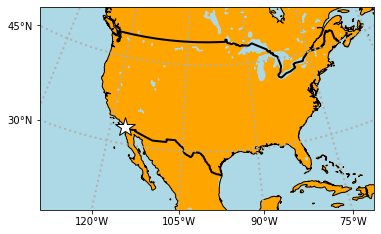

In [18]:
proj = ccrs.LambertConformal(central_longitude=260.0, central_latitude=33.0)
fig = plt.figure(figsize=(6,6), frameon=True) # You need this frameon to be true
ax = plt.axes(projection=proj)
ax.set_extent([-130.0, -70.0, 20.0, 52.0], crs=ccrs.PlateCarree())
ax.add_feature(OCEAN, color='lightblue')
ax.add_feature(LAND, color='orange')
ax.add_feature(LAKES, color='lightblue', linewidth=1)
ax.plot([San_lon], [San_lat], marker='*',color='white',\
        markersize=20, transform=ccrs.Geodetic(), markeredgecolor='black')

# *must* call draw in order to get the axis boundary used to add ticks:
fig.canvas.draw()

xticks = list(np.arange(-180.0, -30.0, 15.0))
yticks = list(np.arange(0.0, 90.0, 15.0))

ax.gridlines(ylocs=yticks, xlocs=xticks, linewidth=2, linestyle="dotted")
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) # You need this here
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)# You need this here, too

lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)

ax.coastlines();
ax.add_feature(BORDERS, linestyle='-', linewidth=2);

And finish off with the state boundaries like this: 

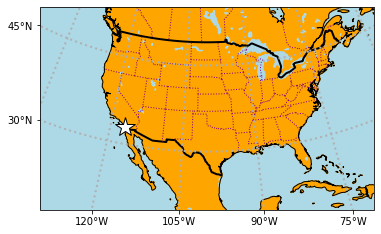

In [19]:
proj = ccrs.LambertConformal(central_longitude=260.0, central_latitude=33.0)
fig = plt.figure(figsize=(6,6), frameon=True) # You need this frameon to be true
ax = plt.axes(projection=proj)
ax.set_extent([-130.0, -70.0, 20.0, 52.0], crs=ccrs.PlateCarree())
ax.add_feature(OCEAN, color='lightblue')
ax.add_feature(LAND, color='orange')
ax.add_feature(LAKES, color='lightblue', linewidth=1)
ax.plot([San_lon], [San_lat],marker='*', color='white',\
        markersize=20, transform=ccrs.Geodetic(), markeredgecolor='black')

# *must* call draw in order to get the axis boundary used to add ticks:
fig.canvas.draw()

xticks = list(np.arange(-180.0, -30.0, 15.0))
yticks = list(np.arange(0.0, 90.0, 15.0))

ax.gridlines(ylocs=yticks, xlocs=xticks, linewidth=2, linestyle="dotted")
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) # You need this here
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)# You need this here, too

lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)

ax.coastlines();
ax.add_feature(BORDERS, linestyle='-', linewidth=2)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        edgecolor='purple',
        facecolor='none',
        linestyle='dotted')
ax.add_feature(states_provinces);

You might also want to know that there are other options for background colors but **cartopy** has a very limited set:
the stock image, several Blue Marble version and a shaded relief map. Let's  plot one. Note: This may take ~80 sec to render.

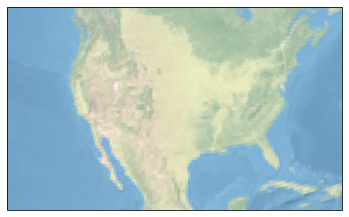

In [20]:
proj = ccrs.LambertConformal(central_longitude=260.0, central_latitude=33.0)
ax = plt.axes(projection=proj)
ax.set_extent([-130.0, -70.0, 20.0, 52.0], crs=ccrs.PlateCarree())
ax.stock_img();

For more on background images, see this website:  http://earthpy.org/cartopy_backgroung.html

And now for some science! 


### 17.6 Earthquake locations - last 5 years

Remember the data we've been using with latitude and longitude coordinates? Now we can place those on our maps!  Here are all the earthquakes that have occured over a five year period with magnitudes greater than or equal to 5. The data come from:  http://earthquake.usgs.gov/earthquakes/search/ 

Let's take a look:  


In [21]:
open('Datasets/EarthquakeLocations/last5Years.csv').readlines()[0:5]

['http://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=2011-12-09%2000:00:00&endtime=2016-12-16%2023:59:59&minmagnitude=5&orderby=time\n',
 'time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource\n',
 '2016-12-15T22:23:28.760Z,-9.9259,160.5101,35,5.3,mb,,32,0.736,1.14,us,us2000815j,2016-12-15T22:40:35.040Z,"82km SE of Honiara, Solomon Islands",earthquake,5.9,2,0.043,184,reviewed,us,us\n',
 '2016-12-15T01:29:27.610Z,-29.1659,61.0004,13.71,5.3,mb,,62,9.275,1.29,us,us200080w8,2016-12-15T01:57:38.040Z,"Southwest Indian Ridge",earthquake,10.9,3.6,0.065,80,reviewed,us,us\n',
 '2016-12-15T01:06:28.010Z,10.1317,126.1709,80.09,5.1,mb,,103,3.098,1.16,us,us200080vz,2016-12-15T07:52:00.028Z,"16km NE of San Isidro, Philippines",earthquake,10.1,11.1,0.158,13,reviewed,us,us\n']

So we have to skip the first row (by setting the keyword `skiprows` to 1).  

In [22]:
eq_data = pd.read_csv('Datasets/EarthquakeLocations/last5Years.csv', skiprows=1)
eq_data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

There is a lot of information in this file, but the most important (for now)  is the latitude and longitude.  We can deal with the depth and magnitude later.  

For now, let's extract that location information into arrays. 

Remember, this is how you get stuff out of a Pandas `DataFrame` into **NumPy** arrays: 

In [23]:
lats = eq_data.latitude.values # Make an array of the values of a pandas Series.
lons = eq_data.longitude.values
lons = lons
print(lats)
print(lons)

[ -9.9259 -29.1659  10.1317 ...  11.077   -0.863   47.009 ]
[160.5101  61.0004 126.1709 ... 125.999  126.907  144.551 ]


Now we can  plot these on a Mollweide projection. Everything is just as we did before, except  I'm putting on the earthquake locations as white dots. The size of the dots can be set with the keyword `markersize`.  

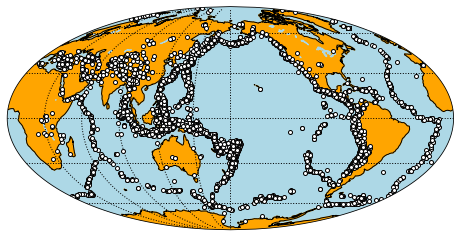

In [24]:
plt.figure(1, (8, 8)) # Make a big figure (8x8)
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=180.0))
gl = ax.gridlines(crs=ccrs.PlateCarree(),color='black',linewidth=1,linestyle='dotted')
gl.ylocator = mticker.FixedLocator(np.arange(-90.0, 91.0, 30.0))
gl.xlocator = mticker.FixedLocator(np.arange(0.0, 400.0, 30.0));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.add_feature(OCEAN, color='lightblue')
ax.add_feature(LAND, color='orange')
ax.add_feature(LAKES, color='lightblue', linewidth=1)
ax.plot([lons], [lats], marker='o', color='white',\
      markersize=4, transform=ccrs.Geodetic() ,markeredgecolor='black')
ax.set_global()

ax.coastlines();

And did you notice how most of  the earthquakes fall in narrow bands?  Those are the plate boundaries you have have heard so much about of course. 

You might have also heard that earthquakes at trenches (like around the Pacific ocean's "ring of fire") get deeper in a systematic way and reveals the location of the downgoing slabs.  

Included with this dataset, is the depth of the earthquakes, so we could color code the dots by depth and try to see the pattern.  

First let's see the range and frequency of different depths. We can plot them in a histogram to take a quick peek.  

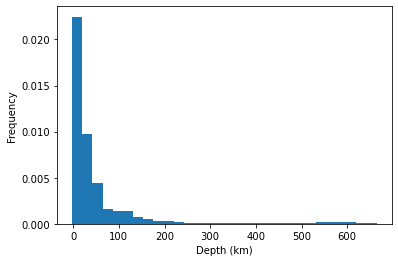

In [25]:
plt.hist(eq_data.depth.values, bins=30, density=True)
plt.xlabel('Depth (km)')
plt.ylabel('Frequency');

The majority of earthquakes occur in the top 30-50 km but they continue all the way down to 650 km.  So let's make  some bins to group the data by depth.  We'll then color code the earthquakes, like the visible light spectrum, with the deepest earthquakes plotted as red.  


In [26]:
depths = [33.0, 70.0, 150.0, 300.0, 400.0, 650.0] # List of depth bins
colors = ['purple', 'blue', 'lightblue', 'green', 'yellow', 'orange', 'red']

Putting it all together:

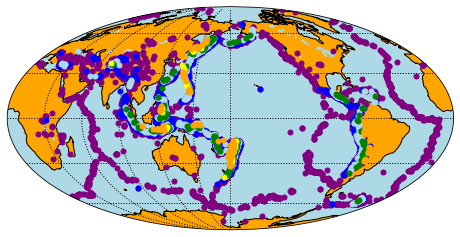

In [27]:
# This is just like before except for the background color (now white) 
plt.figure(1, (8, 8)) # Make a big figure (8x8)
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=180.0))
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='black', linewidth=1, linestyle='dotted')
gl.ylocator = mticker.FixedLocator(np.arange(-90.0, 91.0, 30.0))
gl.xlocator = mticker.FixedLocator(np.arange(0.0, 400.0, 30.0));
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.add_feature(OCEAN, color='lightblue')
ax.add_feature(LAND, color='orange')
ax.add_feature(LAKES, color='lightblue', linewidth=1)

# Left out some fiddly bits to keep the map simple
# Now we put on the earthquakes
last_bin = 0 # This is the lower bound of the first bin for depths
# or the upper bound of the last bin (same thing)

for d in depths: # Step through the depths list
    # use Pandas filtering to fish out depths in this range
    depth = eq_data[(eq_data.depth < d) & (eq_data.depth >= last_bin)]  # Use the filtering of Pandas
    # Convert to map coordinates
    # Put this batch of earthquakes on the map
    plt.plot([depth.longitude.values], [depth.latitude.values],\
             transform=ccrs.Geodetic(), marker='o', color=colors[depths.index(d)], markersize=5) 
    # Replace the lower depth bound with the upper one
    last_bin = d # Increment the lower bound for the bin

ax.set_global()
ax.coastlines();

Well, at least we see that the ridges all have shallow earthquakes and the deepest earthquakes are the farthest from the trench - to really see the so-called "Benioff zones" we should use 3-D plots and zoom in on the area of interest. We will learn 3-D plotting tricks soon, so be patient. :) 